# Pie chart view distribution

→ [Go back to overview of all statistics](./index.html)

In [1]:
from datetime import datetime

print(f"Date of last update: {datetime.now().strftime('%d.%m.%Y, %H:%M')}")

Date of last update: 13.07.2025, 18:01


## Utility functions and imports

In [2]:
%load_ext jupyter_ai_magics

In [3]:
%load_ext autoreload

In [4]:
%autoreload 2

In [5]:
import plotly.express as px

from IPython.display import display, Markdown
from mfnf import MFNF


def md(text):
    display(Markdown(text))


df = MFNF().aggregate_pageviews()

## View chart in pie chart

### Sunburst chart

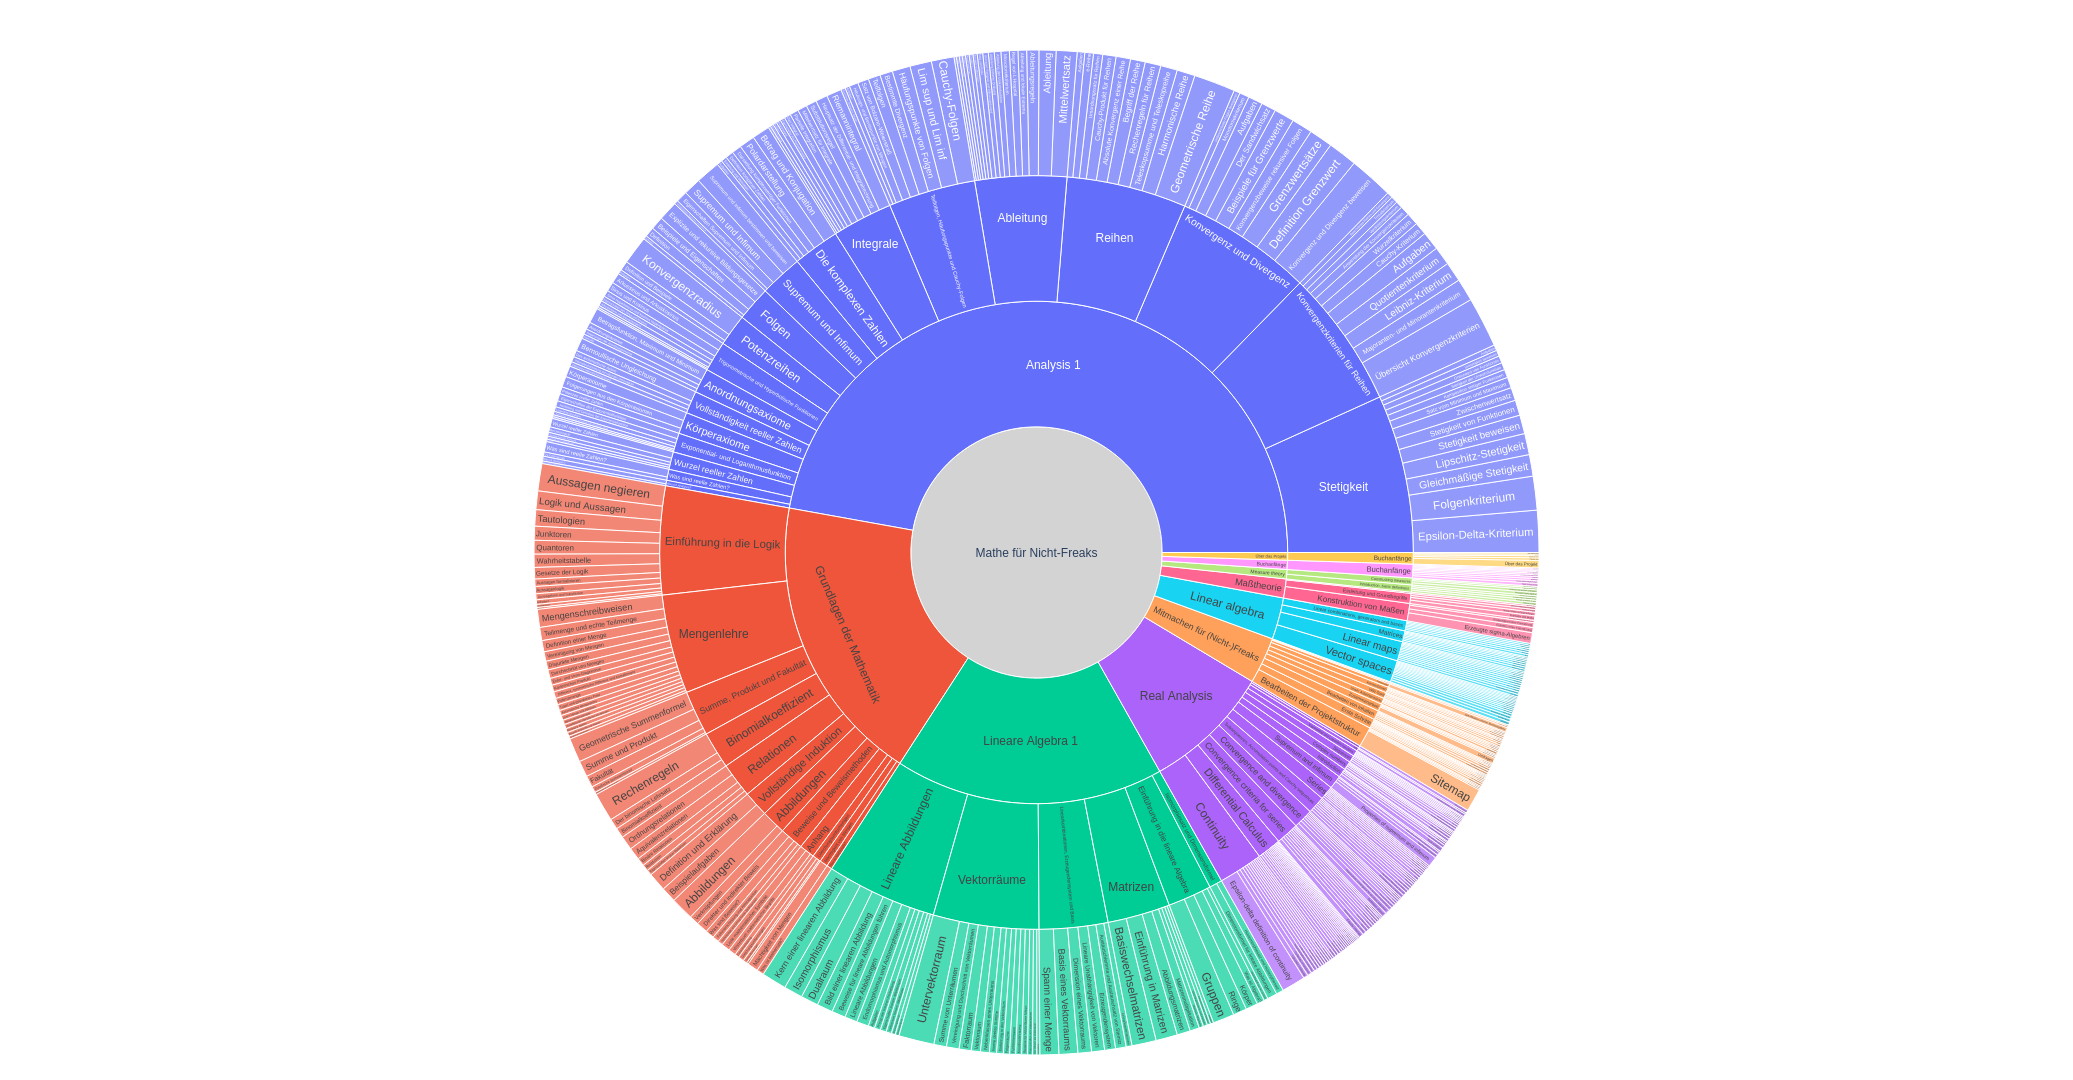

### Treemap chart

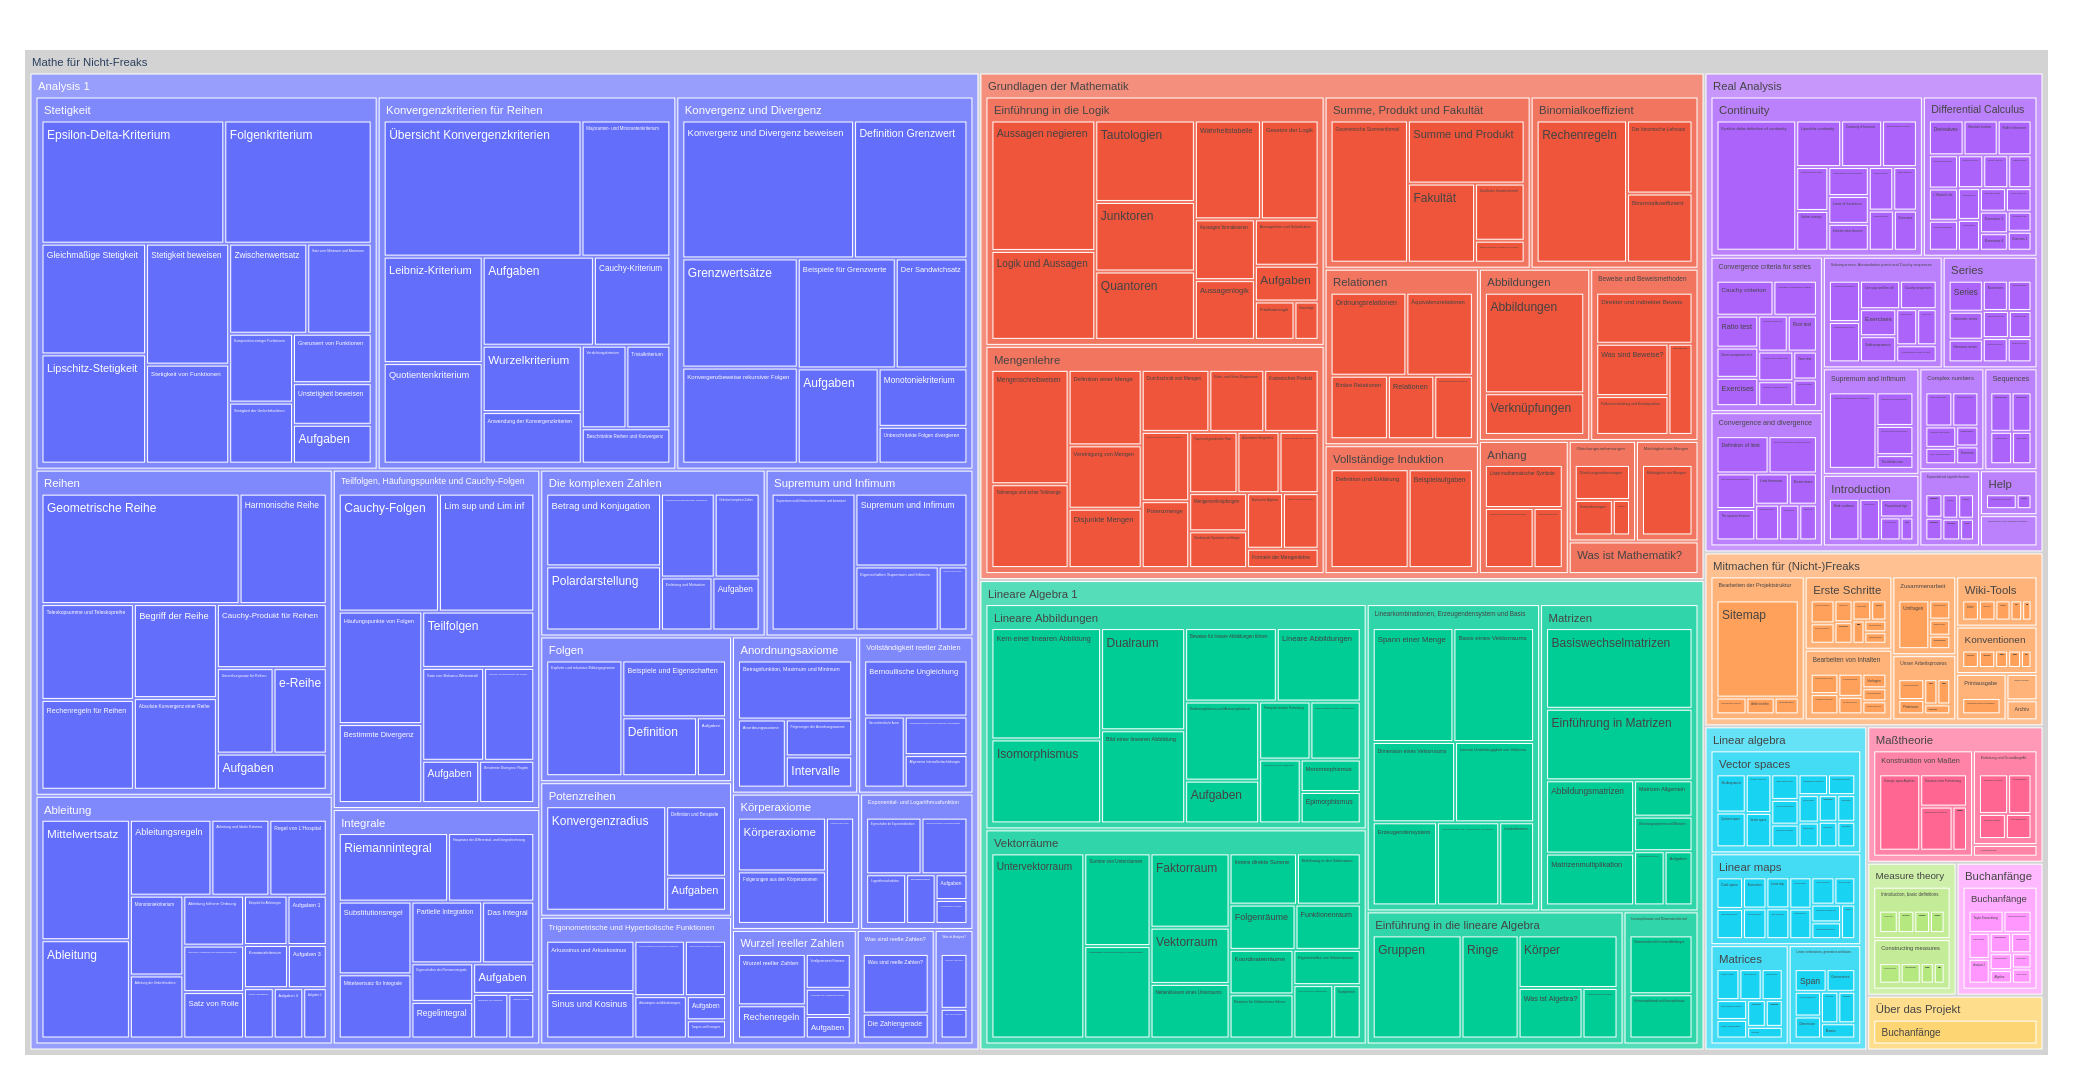

In [21]:
from datetime import datetime, timedelta


def analyze(df):
    one_year_ago = datetime.now() - timedelta(days=365)
    df = df[df["timestamp"] > one_year_ago]
    df["parent"] = df["section_name"].combine_first(df["book_name"]).combine_first(df["target_title"])
    df["name"] = df["page_name"].combine_first(df["target_title"])
    df = df.groupby(["name", "section_name", "book_name"])["views"].sum().reset_index()
    df["project"] = "Mathe für Nicht-Freaks"

    md("### Sunburst chart")
    
    fig = px.sunburst(df, path=["project", "book_name", "section_name", "name"], values="views", width=1080, height=1080)
    fig.update_traces(root_color="lightgrey")
    fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
    fig.show()

    md("### Treemap chart")

    fig = px.treemap(df, path=["project", "book_name", "section_name", "name"], values="views", height=1080)
    fig.update_traces(root_color="lightgrey")
    fig.update_layout(margin = dict(t=50, l=25, r=25, b=25))
    fig.show()


analyze(df.copy())

## License of this report

Copyright 2025 Stephan Kulla ("Kulla")

Licensed under the Apache License, Version 2.0 (the "Apache License") and Creative Commons Attribution 4.0 International (the "CC-BY License"). You may choose either of these licenses to govern your use of this project.

You may obtain a copy of the Apache License at:
    http://www.apache.org/licenses/LICENSE-2.0

You may obtain a copy of the CC-BY License at:
    https://creativecommons.org/licenses/by/4.0/

Unless required by applicable law or agreed to in writing, software and content distributed under the Apache License is distributed on an "AS IS" BASIS, WITHOUT WARRANTIES OR CONDITIONS OF ANY KIND, either express or implied. See the Apache License for the specific language governing permissions and limitations under the License.

Under the CC-BY License, you are free to share and adapt the material provided you give appropriate credit, provide a link to the license, and indicate if changes were made. See the CC-BY License for full details.

Third-Party Components and Licenses:
This product also includes third-party components which are distributed under their respective licenses. Please refer to the NOTICE file for details.